In [34]:
from google.colab import auth
from google.auth import default
import gspread
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [35]:
sheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1DrzAzEGT70O45KKXulY6DwGdorkiAFfjb6MCnyNsnAg/edit").worksheet("Form Responses 1")

# Convert to pandas DataFrame
data = sheet.get_all_records()
df = pd.DataFrame(data)

df

,Timestamp,sessionID,segmentType,surfaceType,eventType,playerSpeed
0,10/22/2025 16:10:26,638967461859425530,30L,Normal,crash,124.07
1,10/23/2025 21:57:03,638968533682200570,30L,Wet,crash,139.12
2,10/22/2025 14:21:02,638967395976115010,30R,Normal,crash,97.37
3,10/23/2025 22:00:40,638968535715143050,30R,Wet,crash,187.75
4,10/24/2025 11:39:56,638969027851917230,30R,Normal,crash,83.84
...,...,...,...,...,...,...
77,10/24/2025 11:37:48,638969026336354820,Straight,Normal,crash,108.77
78,10/24/2025 11:43:23,638969029789359330,Straight,Normal,crash,168.66
79,10/24/2025 11:43:35,638969029789359330,Straight,Wet,crash,159.35
80,10/22/2025 16:56:42,638967489680906220,up,Wet,crash,191.05


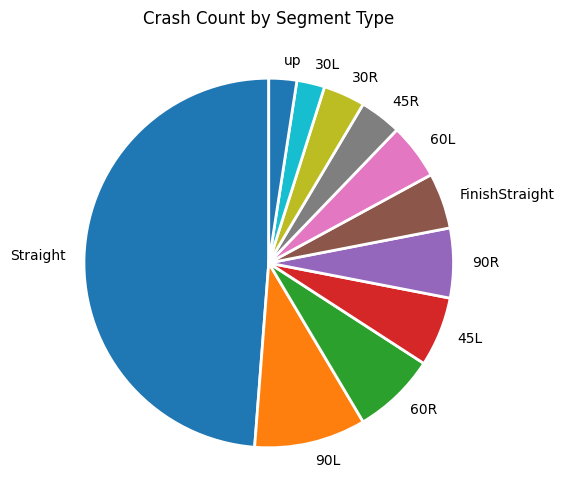

,count
segmentType,
Straight,40
90L,8
60R,6
45L,5
90R,5
FinishStraight,4
60L,4
45R,3
30R,3


In [36]:
import matplotlib.pyplot as plt

segment_counts = df['segmentType'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(segment_counts, labels=segment_counts.index,
        startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})
plt.title('Crash Count by Segment Type')
plt.show()

segment_counts

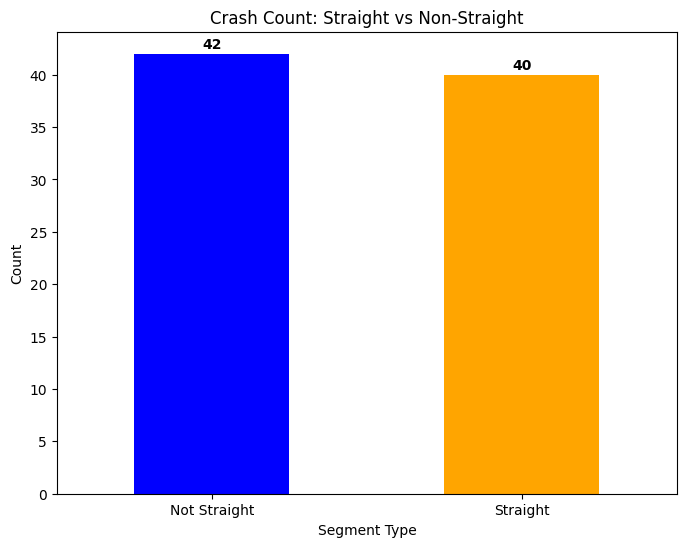

In [37]:
df['segment_category'] = df['segmentType'].apply(lambda x: 'Straight' if x == 'Straight' else 'Not Straight')

segment_counts = df['segment_category'].value_counts()

plt.figure(figsize=(8, 6))
ax = segment_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Crash Count: Straight vs Non-Straight')
plt.xlabel('Segment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

for i, v in enumerate(segment_counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()